 # 연령별 요양일수

## EDA

##### 20_명세서일반내역 데이터셋 탐색적분석 결과
##### 연령별로 요양일수에 유의미한 차이여부 분석 필요성 발생
##### x= 연령구간, y= 요양일수 로 설정
##### x <- 수진자연령을 구간별로 조건을 달리해 컬럼생성
##### y <- 요양일수를 통한 정제 

# 데이터 정제

### 데이터 불러오기

In [1]:
import pandas as pd

In [2]:
sheet_list = ["20table_명세서일반내역",
                  "30table_진료내역",
                  "40table_상병",
                  "53table_처방전상세내역"]

In [3]:
for i in range (len(sheet_list)):
    file_path = './files_new2/df_kor_{}.xlsx'.format(sheet_list[i])
    globals()['df{}'.format(i)] = pd.read_excel(file_path, index_col=0)

In [26]:
df0 = df0.reset_index()

### X : 연령별 구간분류

In [25]:
df0['연령대'] = 0
df0

,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,보험자코드,...,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,연령대
명세서 연결코드,,,,,,,,,,,,,,,,,,,,,
1,169,3,0,3,13,0.030001,33.332599,62,1,4,...,9430,2800,6630,0,$,$,$,$,30796,0
2,183,3,0,8,15,0.030000,33.332882,74,2,4,...,4380,500,3880,0,$,$,$,$,9795,0
3,23,3,0,3,3,0.030000,33.332920,14,1,4,...,3310,1300,2010,0,$,$,$,$,34835,0
4,96,3,0,5,14,0.030000,33.333002,68,1,4,...,26660,7900,18760,0,$,$,$,$,35538,0
5,28,3,0,3,4,0.030001,33.332721,19,1,4,...,9430,2800,6630,0,$,$,$,$,4665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5627,178,3,0,5,2,0.030000,33.332844,9,2,4,...,13310,3900,9410,0,$,$,$,$,21762,0
5628,295,3,0,3,4,0.030001,33.332721,20,1,4,...,71310,3500,67810,0,V193,$,$,$,45362,0
5629,246,3,0,3,1,0.030000,33.333050,4,1,4,...,13820,2900,10920,0,$,$,$,$,12083,0


In [27]:
for i in range(len(df0)):
    if df0['수진자연령'][i] <= 9:
        df0['연령대'][i] = '9세이하'
    elif (df0['수진자연령'][i] >= 10) & (df0['수진자연령'][i] <= 19):
        df0['연령대'][i] = '10대'
    elif (df0['수진자연령'][i] >= 20) & (df0['수진자연령'][i] <= 29):
        df0['연령대'][i] = '20대'
    elif (df0['수진자연령'][i] >= 30) & (df0['수진자연령'][i] <= 39):
        df0['연령대'][i] = '30대'
    elif (df0['수진자연령'][i] >= 40) & (df0['수진자연령'][i] <= 49):
        df0['연령대'][i] = '40대'
    elif (df0['수진자연령'][i] >= 50) & (df0['수진자연령'][i] <= 59):
        df0['연령대'][i] = '50대'
    elif (df0['수진자연령'][i] >= 60) & (df0['수진자연령'][i] <= 69):
        df0['연령대'][i] = '60대'
    elif (df0['수진자연령'][i] >= 70) & (df0['수진자연령'][i] <= 79):
        df0['연령대'][i] = '70대'
    elif (df0['수진자연령'][i] >= 80) & (df0['수진자연령'][i] <= 89):
        df0['연령대'][i] = '80대'
    elif (df0['수진자연령'][i] >= 90) & (df0['수진자연령'][i] <= 99):
        df0['연령대'][i] = '90대'

C:\Users\admin\AppData\Local\Temp\ipykernel_8904\3347590790.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['연령대'][i] = '60대'


In [28]:
df0['연령대'].value_counts()

60대     1158
70대     1023
50대      876
9세이하     669
40대      643
30대      442
10대      399
20대      289
80대      122
90대       10
Name: 연령대, dtype: int64

In [29]:
df0

,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,성별구분코드,...,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,특정기호구분코드,의료급여종별코드,방사선진단여부,방사선치료여부,요양기관 고유번호,연령대
0,1,169,3,0,3,13,0.030001,33.332599,62,1,...,9430,2800,6630,0,$,$,$,$,30796,60대
1,2,183,3,0,8,15,0.030000,33.332882,74,2,...,4380,500,3880,0,$,$,$,$,9795,70대
2,3,23,3,0,3,3,0.030000,33.332920,14,1,...,3310,1300,2010,0,$,$,$,$,34835,10대
3,4,96,3,0,5,14,0.030000,33.333002,68,1,...,26660,7900,18760,0,$,$,$,$,35538,60대
4,5,28,3,0,3,4,0.030001,33.332721,19,1,...,9430,2800,6630,0,$,$,$,$,4665,10대
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,5627,178,3,0,5,2,0.030000,33.332844,9,2,...,13310,3900,9410,0,$,$,$,$,21762,9세이하
5627,5628,295,3,0,3,4,0.030001,33.332721,20,1,...,71310,3500,67810,0,V193,$,$,$,45362,20대
5628,5629,246,3,0,3,1,0.030000,33.333050,4,1,...,13820,2900,10920,0,$,$,$,$,12083,9세이하
5629,5630,253,3,0,3,10,0.030000,33.332913,47,2,...,9430,2800,6630,0,$,$,$,$,21067,40대


### Y : 연령별 수술횟수

In [30]:
df0['요양일수'].sum()

9005

In [31]:
gdf = df0.groupby('연령대').sum('요양일수').reset_index()
gdf

,연령대,명세서 연결코드,수진자고유번호,청구형태코드,청구구분코드,서식코드,연령군,추출확률,샘플가중치,수진자연령,...,진료결과구분코드,진료과목코드,최초입원일자,요양일수,내원일수,심결요양급여비용총액,심결본인부담금,심결보험자부담금,수술여부,요양기관 고유번호
0,10대,1120035,51813,1197,0,1285,1287,11.970131,13299.854091,5674,...,440,4775,0.0,837,399,7343340,2409580,4931510,81,10106515
1,20대,792348,45903,863,9,963,1578,8.670076,9633.249371,7182,...,315,4590,140886126.0,376,356,12534520,3962910,8571610,81,7112389
2,30대,1272667,64648,1323,0,1369,3287,13.260113,14733.207576,15423,...,594,3833,140915310.0,661,446,11570310,3094790,8475520,72,10400051
3,40대,1771802,102221,1929,3,2037,6128,19.290169,21433.145670,29216,...,715,8177,40261146.0,801,695,44414110,7781600,36632510,162,15922639
4,50대,2450148,156956,2619,3,2867,10188,26.280256,29199.715634,48415,...,1081,7654,161047060.0,1495,914,55613990,10517090,45096900,189,21202649
5,60대,3246391,202449,3467,15,3699,15486,34.740433,38599.519192,74108,...,1410,10340,100655025.0,1417,1324,86258330,16297290,69961040,189,27588402
6,70대,2881662,171950,3067,39,3305,15665,30.690343,34099.619457,75161,...,1211,7236,543406618.0,2207,1449,58643560,12545250,45679210,135,26109089
7,80대,350610,19134,366,0,464,1952,3.660060,4066.600427,9958,...,194,1339,40261134.0,482,122,3078660,810600,2268060,27,3263680
8,90대,28750,340,30,0,35,160,0.300005,333.328246,938,...,14,41,0.0,14,10,128850,25800,103050,0,224032
9,9세이하,1942483,120993,2004,0,2109,859,20.070185,22299.794854,2994,...,821,9213,120785750.0,715,683,12417910,3195760,9222150,117,17221408


In [32]:
gdf['요양일수'].sum()

9005

In [33]:
gdf=gdf[['연령대','요양일수']]
gdf

,연령대,요양일수
0,10대,837
1,20대,376
2,30대,661
3,40대,801
4,50대,1495
5,60대,1417
6,70대,2207
7,80대,482
8,90대,14
9,9세이하,715


# 시각화

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

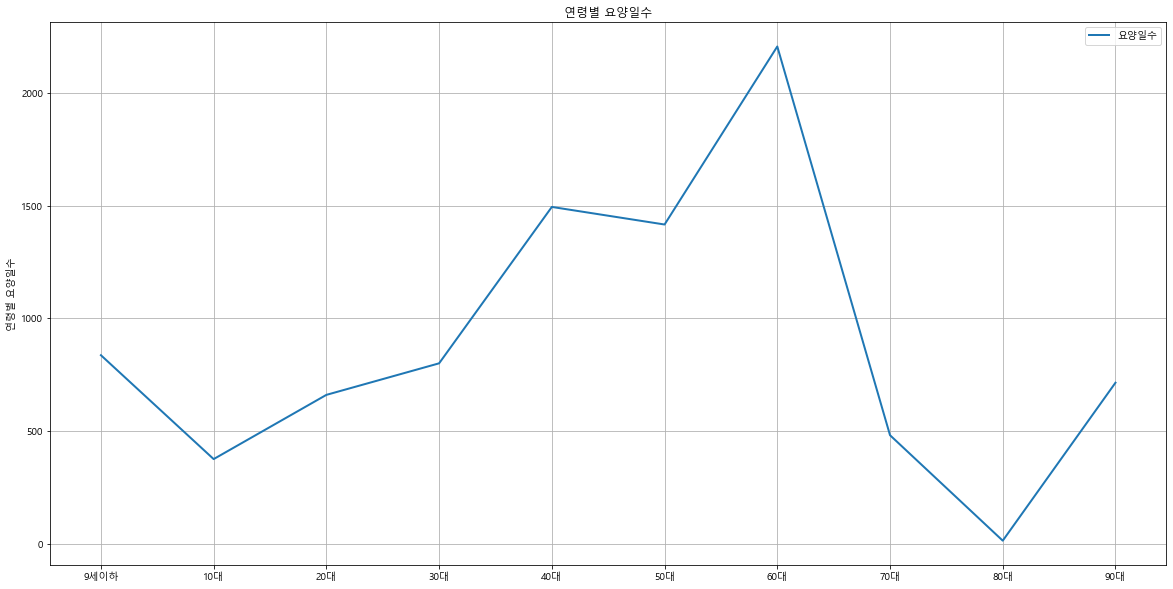

In [35]:
# 그래프 크기 지정하기 = 너비.높이
plt.rcParams['figure.figsize'] = (20,10)
# 선의 두께 지정
plt.rcParams['lines.linewidth'] = 2
# 폰트 지정
plt.rc('font',family = 'Malgun Gothic', size=10)

# 데이터 넣기
gdf.plot()

plt.title('연령별 요양일수')
plt.ylabel('연령별 요양일수')

plt.xticks([i for i in range(0,10,1)],['9세이하','10대','20대','30대','40대','50대','60대','70대','80대','90대'])

# 범례 위치 변경하기
plt.legend(loc='upper right')

# 그래프 내에 그리드선 표시하기
plt.grid(True)

plt.show()

# 결론

##### 60대가 가장 많은 요양일수를 기록
##### 80대가 가장 적은 요양일수를 기록
##### 70대에서 가장 많은 감소 확인
- 거동이 힘들거나, 인구수 감소, 독거노인화, 요양병원기록으로인한 제외 등으로 추정
- 다양한 추가적인 원인분석 필요